In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping as ES
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler as SS
from keras.models import Model
from tensorflow.keras.applications import VGG16
import cv2
from keras.preprocessing.image import ImageDataGenerator as IDG
import pickle as pp

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats


100% 1.06G/1.06G [00:31<00:00, 35.0MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.1MB/s]


In [6]:
import zipfile
zip=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip.extractall("/content")
zip.close()

In [7]:
train_1=IDG(
    rescale=1/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
)

test_1=IDG(
    rescale=1/255,
    fill_mode='constant',
)
train_2=train_1.flow_from_directory("/content/train",color_mode='rgb',target_size=(256,256),batch_size=3,class_mode="binary")
test_2=test_1.flow_from_directory("/content/test",color_mode='rgb',target_size=(256,256),batch_size=3,class_mode="binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
VGG=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(256,256,3)
    
)

58889256/58889256 [==============================] - 2s 0us/step


In [9]:
VGG.trainable=False

In [10]:
for i in VGG.layers:
  print(i.name,"=",i.trainable)

input_1 = False
block1_conv1 = False
block1_conv2 = False
block1_pool = False
block2_conv1 = False
block2_conv2 = False
block2_pool = False
block3_conv1 = False
block3_conv2 = False
block3_conv3 = False
block3_pool = False
block4_conv1 = False
block4_conv2 = False
block4_conv3 = False
block4_pool = False
block5_conv1 = False
block5_conv2 = False
block5_conv3 = False
block5_pool = False


In [11]:
for i in VGG.layers:
  if "block5" in i.name:
    i.trainable=True

In [12]:
for i in VGG.layers:
  print(i.name,"=",i.trainable)

input_1 = False
block1_conv1 = False
block1_conv2 = False
block1_pool = False
block2_conv1 = False
block2_conv2 = False
block2_pool = False
block3_conv1 = False
block3_conv2 = False
block3_conv3 = False
block3_pool = False
block4_conv1 = False
block4_conv2 = False
block4_conv3 = False
block4_pool = False
block5_conv1 = True
block5_conv2 = True
block5_conv3 = True
block5_pool = True


In [43]:
model=Sequential()
model.add(VGG)

model.add(Flatten())

model.add(Dense(150,activation="relu"))

model.add(Dense(100,activation="relu"))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 150)               4915350   
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 19,645,239
Trainable params: 4,930,551
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [45]:
es=ES(monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,)

In [47]:
history=model.fit(train_2,steps_per_epoch=800,epochs=3,validation_data=test_2,validation_steps=500,callbacks=es)

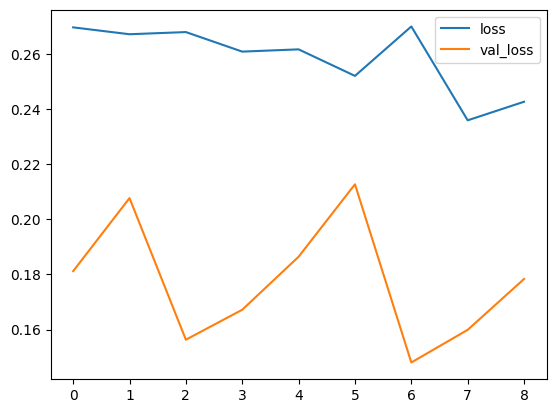

In [40]:
mp.plot(history.history["loss"],label="loss")
mp.plot(history.history["val_loss"],label="val_loss")
mp.legend();

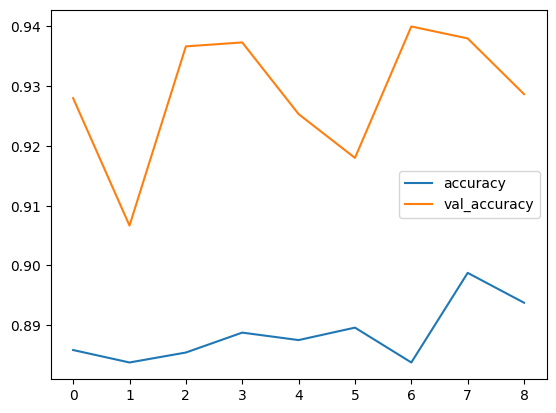

In [41]:
mp.plot(history.history["accuracy"],label="accuracy")
mp.plot(history.history["val_accuracy"],label="val_accuracy")
mp.legend();

In [50]:
model=pp.load(open("/content/cat_dog_model/cat_dog.pkl","rb"))

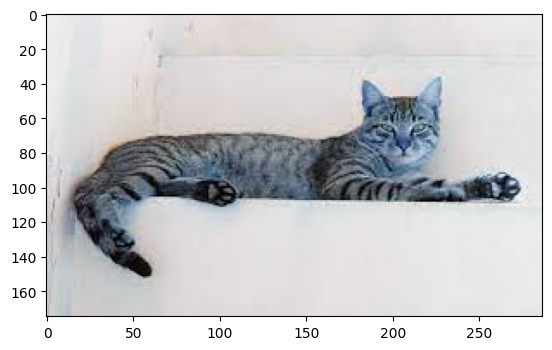

In [90]:
test_cat=cv2.imread("/content/download.jpg")
mp.imshow(test_dog);

In [91]:
test_cat.shape

(175, 287, 3)

In [92]:
test_cat_1=cv2.resize(test_cat,(256,256))

In [93]:
test_cat_1.shape

(256, 256, 3)

In [94]:
test_cat_1=test_cat_1.reshape((1,256,256,3))

In [95]:
ypre=model.predict(test_cat_1)

1/1 [==============================] - 0s 23ms/step


It's a cat




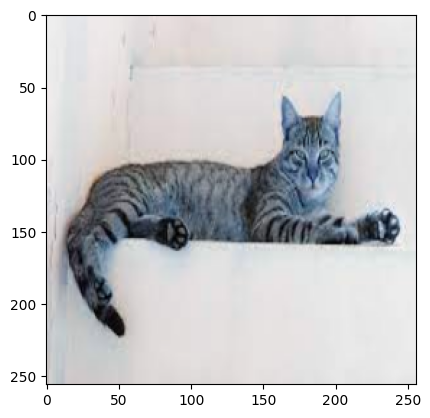

In [97]:
mp.imshow(test_cat_1.reshape((256,256,3)))
if ypre>0.5:
  print("It's a dog\n\n")
else:
  print("It's a cat\n\n")

##**Layer_1**

1/1 [==============================] - 0s 60ms/step


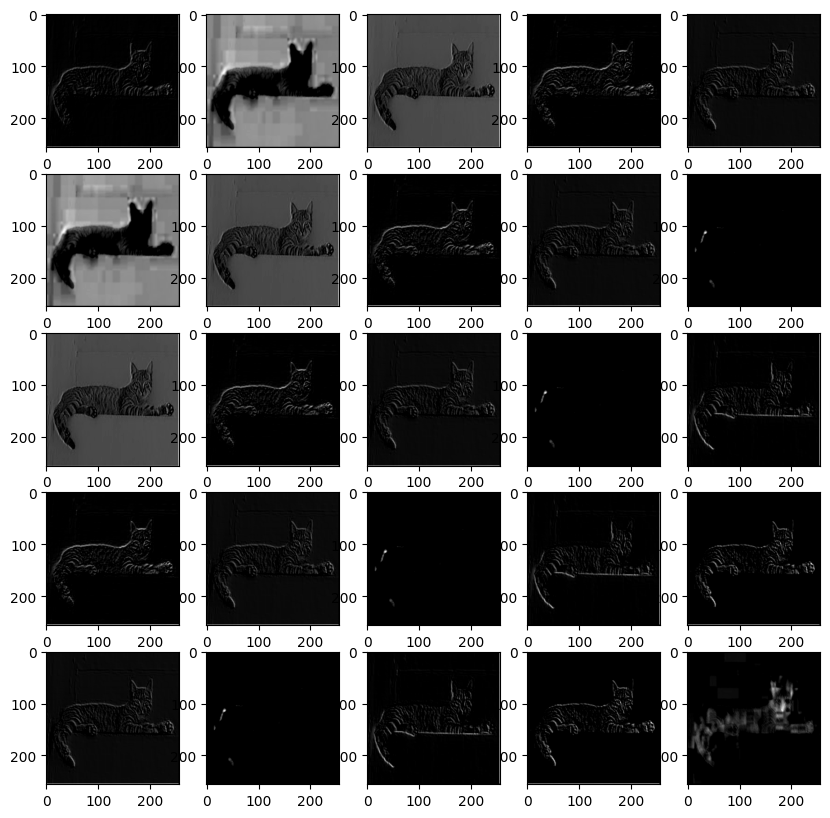

In [85]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[1].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(256,256),cmap="gray");

##**Layer_2**

1/1 [==============================] - 0s 173ms/step


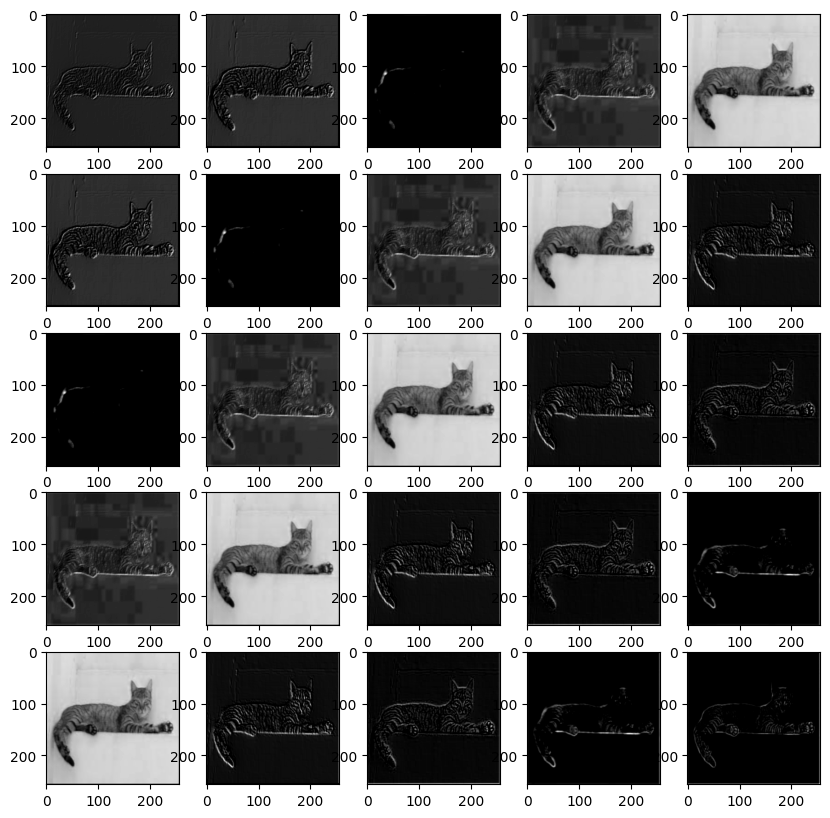

In [86]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[2].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(256,256),cmap="gray");

##**Layer_3**

1/1 [==============================] - 0s 73ms/step


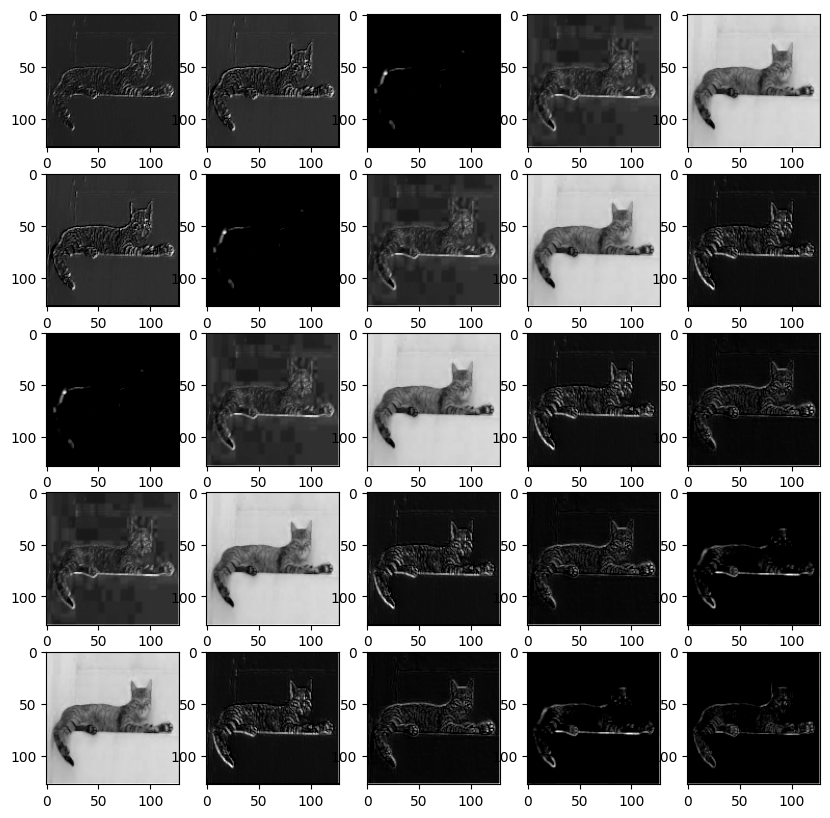

In [89]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[3].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(128,128),cmap="gray");

##**Conv_5_Layer_1**

1/1 [==============================] - 0s 213ms/step


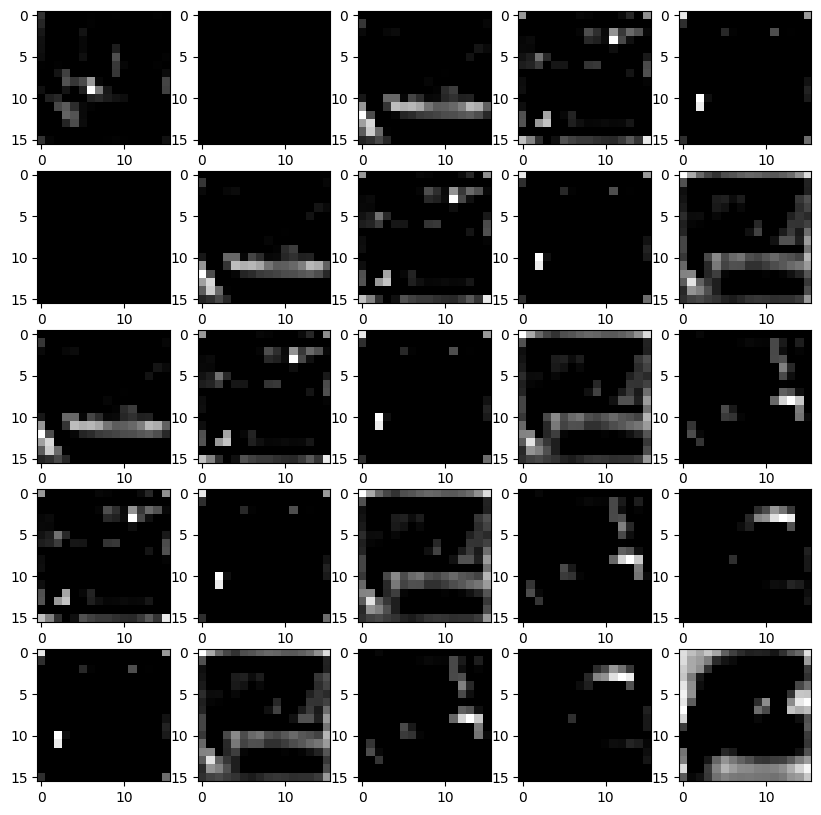

In [82]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[15].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(16,16),cmap="gray");

##**Conv_5_Layer_2**

1/1 [==============================] - 0s 128ms/step


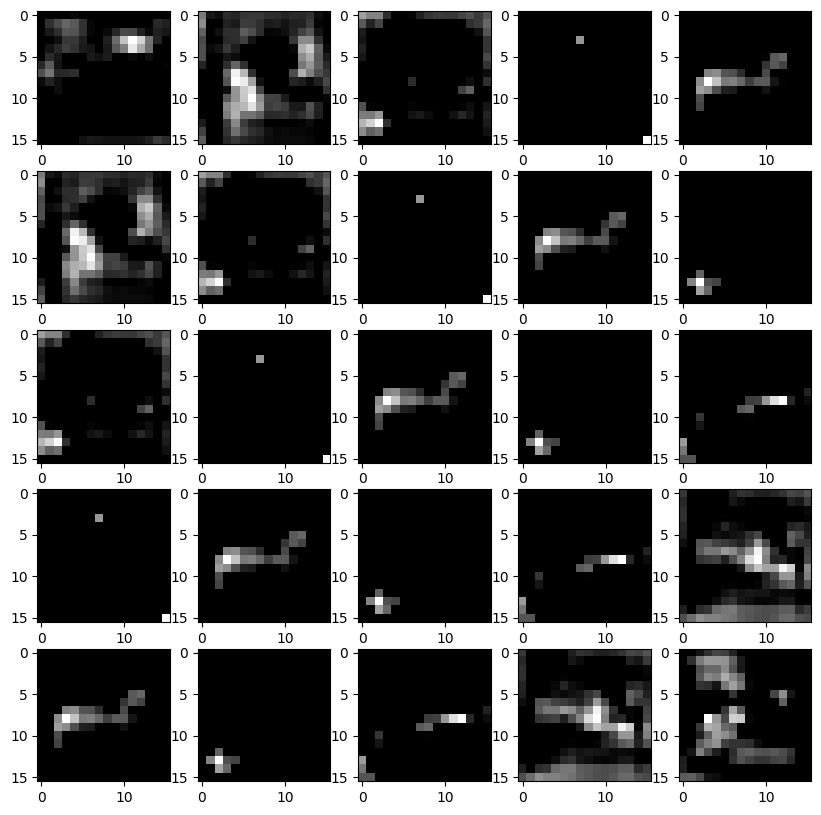

In [99]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[16].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(16,16),cmap="gray");

##**Conv_5_Layer_3**

1/1 [==============================] - 0s 131ms/step


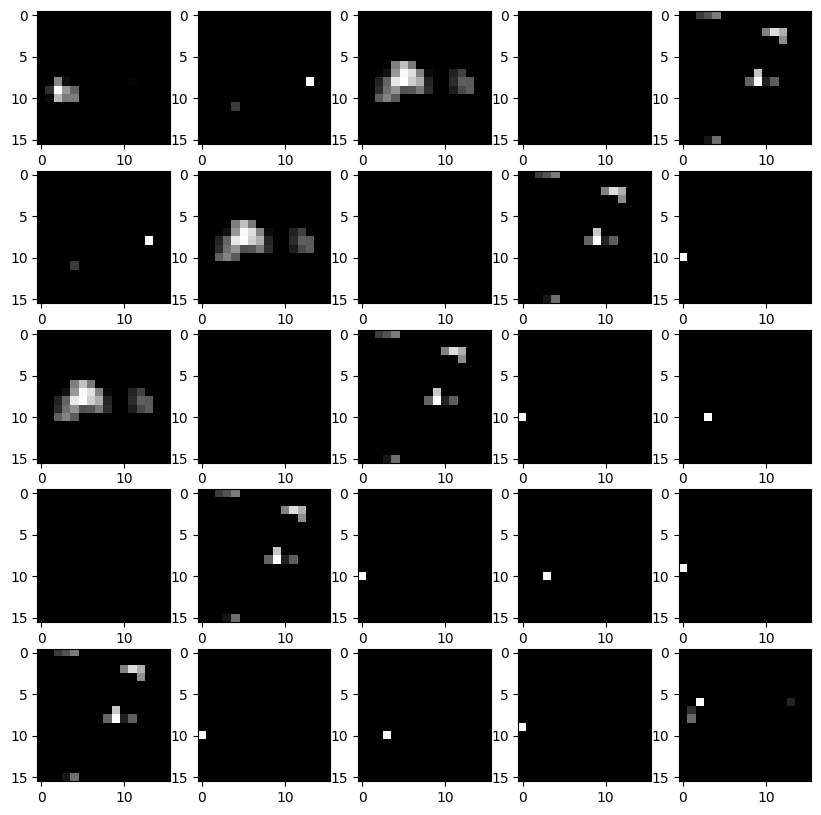

In [100]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[17].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(16,16),cmap="gray");

##**Conv_5_max_pooling**

1/1 [==============================] - 0s 207ms/step


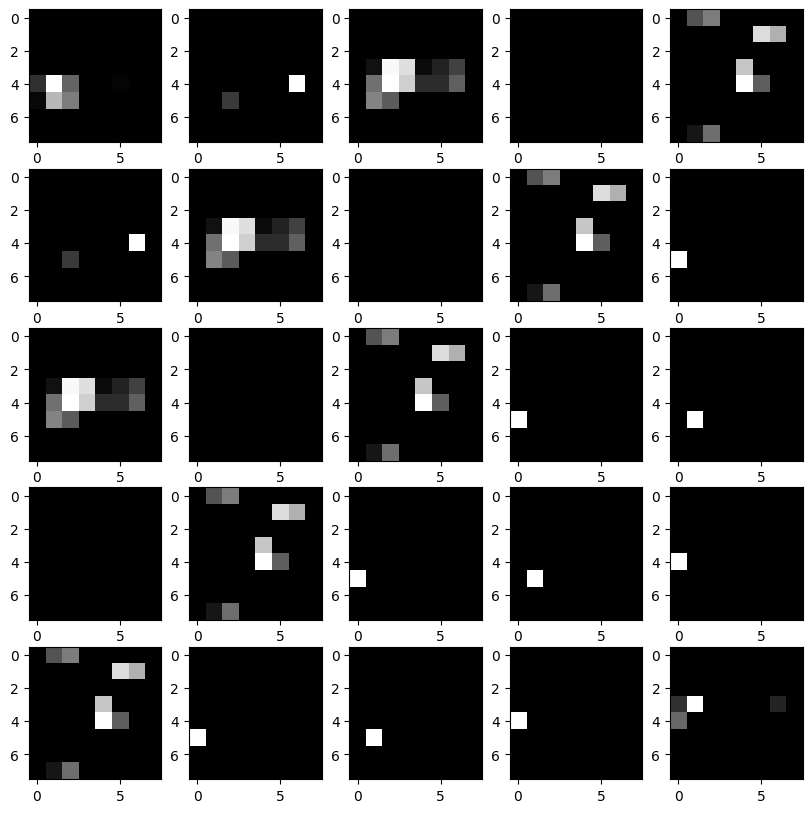

In [102]:
visual=Model(inputs=VGG.inputs,outputs=VGG.layers[18].output)
fm=visual.predict(test_dog_1)
f,a=mp.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        a[i,j].imshow(fm[:,:,:,i+j].reshape(8,8),cmap="gray");